# Pauli Evolution Visualization Examples

This notebook demonstrates how to use the PauliTreeTracker for visualizing Pauli string evolution during quantum circuit propagation. The visualization capability allows you to track how Pauli strings transform through different types of quantum gates and noise channels.

## Features Demonstrated:
- **Tree Tracking**: Visualize the branching evolution of Pauli strings
- **GraphViz Export**: Generate DOT files for professional tree diagrams
- **JSON Export**: Export evolution data for further analysis
- **Multiple Gate Types**: Pauli rotations, Clifford gates, and noise channels
- **Merging**: Visualize the merging of Pauli strings

*Note: You will need to install the [GraphViz](https://graphviz.org/download/) to visualize the tree.*

*The truncation visualization is not supported yet.*

In [1]:
# Import required packages
using PauliPropagation
using Random
using PlotGraphviz

In [2]:
# check the GraphViz installation
run(`dot -V`)

dot - graphviz version 2.43.0 (0)


Process(`dot -V`, ProcessExited(0))

## Helper Functions

First, let's define some helper functions to create different types of quantum circuits for our examples.


In [3]:
# Mixed circuit with Clifford and Pauli rotation gates
function create_example_circuit()
    return [
        CliffordGate(:X, 1),
        PauliRotation(:X, 1),    # RX rotation (branches)
        CliffordGate(:H, 1),     # Hadamard gate (no branching)
        PauliRotation(:Z, 1),    # RZ rotation (branches)
        CliffordGate(:Z, 1),     # Z gate (no branching)
    ]
end

println("Helper functions defined!")


Helper functions defined!


The example below shows how to visualize the propagation of a Pauli string through a circuit.

**Circuit: X -> RX(θ₁) -> H -> RZ(θ₂) -> Z**


In [4]:
export_filename="pauli_evolution_example"
# Create a simple 1-qubit Pauli Sum: X₁ + Y₁ + Z₁
nqubits = 1
psum = PauliSum(nqubits)
add!(psum, [:X], [1], 1.0)
add!(psum, [:Y], [1], 1.0)
add!(psum, [:Z], [1], 1.0)

# Create example circuit
circ = create_example_circuit()

# Set some parameter values
thetas = [π / 4, π / 6]  # θ₁ = π/4, θ₂ = π/6
println("Parameters: θ₁ = π/4, θ₂ = π/6")



Parameters: θ₁ = π/4, θ₂ = π/6


To visualize the propagation, you first need to reset the global tree storage by calling ``reset_tree!()`` or set ``reset_tree_first=true`` in the ``propagate_with_tree_tracking`` function.

The main function to visualize the propagation is ``propagate_with_tree_tracking``. It takes in a circuit, a Pauli string, and a list of parameters. You can specify the export format to be ``graphviz`` or ``json`` or ``summary``.

In [5]:
reset_tree!()

println("Running propagation with tree tracking...")
result = propagate_with_tree_tracking(
    circ, psum, thetas;
    export_format="summary",
    reset_tree_first=true
)

println("\nFinal result:")
println(result)


Running propagation with tree tracking...
=== Pauli Evolution Tree Summary ===
Number of nodes: 26
Number of edges: 27

Gates applied:
  Z: 3 times
  RZ: 5 times
  X: 3 times
  RX: 5 times
  MERGE: 8 times
  H: 3 times

Root nodes: 3
  65ee0422: Y
  da7c09f1: Z
  62731d13: X

Leaf nodes: 3
  e95dcef5: X
  894f8d2d: Y
  bb74b087: Z

Final result:
PauliSum(nqubits: 1, 3 Pauli terms:
 0.70711 * Y
 1.2247 * Z
 1.0 * X
)


After you run the propagation, you can export the tree to a graphviz file or a json file use ``visualize_tree`` function before you reset the tree again.

```julia
visualize_tree("graphviz", "pauli_evolution_example.dot")
visualize_tree("json", "pauli_evolution_example.json")
```

In [6]:
# Export visualization files
println("Exporting to GraphViz...")
visualize_tree("graphviz", export_filename*".dot")

println("Exporting to JSON...")
visualize_tree("json", export_filename*".json")

println("\n🎯 Files generated:")
println("  📊 $export_filename.dot (GraphViz format)")
println("  📋 $export_filename.json (JSON format)")
println("\n💡 To create a PNG visualization, run:")
println("  dot -Tpng $export_filename.dot -o $export_filename.png")


Exporting to GraphViz...
Evolution tree exported to pauli_evolution_example.dot
To visualize, run: dot -Tpng pauli_evolution_example.dot -o pauli_tree.png
Exporting to JSON...
Evolution tree exported to pauli_evolution_example.json

🎯 Files generated:
  📊 pauli_evolution_example.dot (GraphViz format)
  📋 pauli_evolution_example.json (JSON format)

💡 To create a PNG visualization, run:
  dot -Tpng pauli_evolution_example.dot -o pauli_evolution_example.png


You can visualize the generated dot files using the `PlotGraphviz` package.

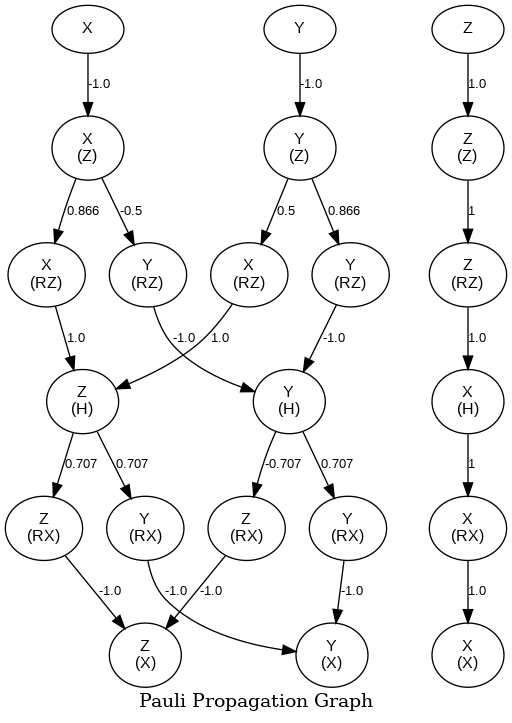

In [7]:
mk, attrs = read_dot_file(export_filename*".dot");
plot_graphviz(mk,attrs;scale = 18)

### Understanding the Tree Structure

- **Nodes**: Represent Pauli strings at different points in evolution, and the gate that is applied to the Pauli string shown in the parentheses.
- **Edges**: Show the coefficient get multiplied to the Pauli string through Pauli Transformation.
- **Merging**: Occurs when same Pauli strings are merged into one.

The visualization can also be used for multi-qubit systems, more examples can be found in ``examples/visualization_example.jl``